In [77]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# An implementation of Softmax Regression (aka Multinomial logistic regression) classifier. 
# train and test functions require a pair of lists (document, label), where label is in the format (0,..., 1, ...0) indicating
# to which class the label belongs
# initiated with n for n-gram 

# class computes n-grams

class SoftmaxRegression:
    
    def __init__(self, num_grams=3, num_features=1800, learning_rate = 0.3, LAMBDA = 0.03):
        self.num_grams = num_grams
        self.num_features = num_features  
        self.features_built = False
        self.learning_rate = learning_rate
        self.LAMBDA = LAMBDA
        
    def train(self, training_set):
        print("Building features.")
        self.K = len(training_set[1][0])
        self.grams_features = self.build_features(training_set[0]) # extends grams_features as necessary
        print("Features built.")
        print("Now converting documents to input matrix.")
        X = self.build_input(training_set[0])
        Y = training_set[1]
      
        self.theta = self.initialize_parameters()
        
        self.batch_gradient_descent(X, Y, 2000)
    
    def batch_gradient_descent(self, X, Y, num_iterations = 2000):
        m = X.shape[0]
        print(m, "training examples")
        n = self.num_features 
        self.training_costs = [[],[]]
        print("Initiating batch gradient descent with " , num_iterations, " iterations.")
        for i in range(num_iterations):
            H = self.softmax(np.dot(X, self.theta))
            if i % 100 == 0:
                cost = self.cost(X, Y, H)
               # print("Loss after ", i, " iterations is ", cost)
                self.training_costs[0].append(i)
                self.training_costs[1].append(cost)
            grads = self.grads(X, Y, H)
            self.theta = self.theta - self.learning_rate * grads
            
    def test(self, test_set):
        test_X = self.build_input(test_set)
        test_Y = self.softmax(np.dot(test_X, self.theta)) 
        max_indices = np.argmax(test_Y, axis = 1)
        return max_indices
    
    def build_input(self, corpus):
        X = []
        for document in corpus:
            X.append(self.doc_to_gram_vec(document))
        return np.array(X)
    
    def build_features(self, corpus):
        all_grams = []
        for n in range(1, self.num_grams):
            ngrams = []
            
            for doc in corpus:
                ngrams.extend(self.compute_grams(doc, n))
                
            fdist = FreqDist(ngram for ngram in ngrams)
            for phrase in fdist.most_common(self.num_features // self.num_grams):
                all_grams.append(phrase[0]) # add common n-gram
        grams_dict = dict(zip(all_grams, range(len(all_grams)))) # converts into dictionary with positions
        self.features_built = True
        return grams_dict
    
    def doc_to_gram_vec(self, doc): # given document, returns vector representing all features
        assert self.features_built
        doc_vec = np.zeros(self.num_features) 
        doc_grams = []
        for n in range(1, self.num_grams):
            doc_grams.extend(self.compute_grams(doc, n))
            
        for gram in doc_grams:
            if gram in self.grams_features:
                doc_vec[self.grams_features[gram]] = 1
        
        return doc_vec
        
    def compute_grams(self, doc, num_grams):  # given a document, and selected n num_grams, computes all n_grams
        tokens = word_tokenize(doc)
        if num_grams == 1:
            return tokens
        else:
            return ngrams(tokens, num_grams)        
    
    def initialize_parameters(self):
        theta = np.random.randn(self.num_features, self.K) * 0.01
        return theta
    
    def cost(self, X, Y, H): 
        m = X.shape[0]
        return -(1/m) *(np.sum(np.multiply(Y, H)) + (self.LAMBDA / 2) * np.sum(np.power(self.theta, 2)))
    
    def grads(self, X, Y, H): # grads will be a matrix
        LAMBDA = self.LAMBDA
        grads = -np.dot(X.T, (Y-H))
        m = X.shape[0]
        grads = (1/m) * (grads + LAMBDA * self.theta)
        return grads
    
    def update_parameters(self, grads, learning_rate):
        self.theta = self.theta - (learning_rate * grads)
        
    def sigmoid(self, x):
        z = np.exp(x)
        z = z / (z+1)
        return z
    
    def predict(self, x):
        probs = softmax(np.dot(self.theta.T, x))
        return argmax(probs)
    
    def softmax(self, Z): # Given matrix Z, returns softmax treating each row as a vector
        Z = np.exp(Z)
        denoms = np.sum(Z, axis = 1)
        denoms = denoms.reshape(Z.shape[0], 1)
        return Z / denoms
    
    print("done")
        
    
        
        

done


In [44]:
X = np.array([[1,2, 3],[4,5, 6]]) 
np.sum(np.power(X, 2), axis = 1)

array([14, 77], dtype=int32)

The following is a pre-processing step. Used from the NB multinomial code.

In [3]:
import pandas as pd
from pandas import DataFrame

def preprocessing_SST(dictionary_of_phrases_filepath, sentences_filepath, phrases_sentiments_filepath, splits_filepath):
    dictionaryDF = pd.read_table(dictionary_of_phrases_filepath, sep = '|', names = ("phrase", "phrase id"))
    sentencesDF = pd.read_table(sentences_filepath, sep = '\t')
    sentimentsDF = pd.read_table(phrases_sentiments_filepath, sep = '|')
    splitsDF = pd.read_csv(splitsFP)
    
    phrases = dict()
    for row in range(len(dictionaryDF)):
        phrase = dictionaryDF['phrase'][row]
        phraseId = dictionaryDF['phrase id'][row]
        sentiment = valToLabel(sentimentsDF['sentiment values'][phraseId])
        words = phrase.split()
        phrases[phrase] = {
            "id" : phraseId,
            "sentiment" : sentiment
        }
    train_docs = list()
    dev_docs = list()
    test_docs = list()
    for id in sentencesDF['sentence_index']:
        sentence = sentencesDF['sentence'][id - 1]
        if (splitsDF['splitset_label'][id - 1] == 1):
            train_docs.append(sentence)
        elif (splitsDF['splitset_label'][id - 1] == 2):
            test_docs.append(sentence)
        else: 
            dev_docs.append(sentence)  
            
    training = pairsToPairOfLists(makeInputTuples(train_docs, phrases))
    #training[1] = labeled_data_finegrained(training[1])
    test = pairsToPairOfLists(makeInputTuples(test_docs, phrases))
    #test[1] = labeled_data_finegrained(test[1])
    dev = pairsToPairOfLists(makeInputTuples(dev_docs, phrases))
    #dev[1] = labeled_data_finegrained(dev[1])
    
    # MAKE SURE TO CLEAN UP THE LISTS 
    return training, dev, test

def normalize(doc): # given document, returns normalized, negation-tracked version
    terminators = {';', '.', '?', '!', '\n', ':', ','}
    negations = {'not', 'no', 'neither', 'never', 'n\'t'}
    sentence = doc.split()
    normalized_doc = ''
    neg_flag = ''
    for word in sentence:
        #print('Considering word ', word)
        word = neg_flag + word
        if word in negations:
            neg_flag = '__NOT__'
        if word[-1] in terminators:
            neg_flag = ''
            word = word[0:-1]
        normalized_doc = normalized_doc + ' ' + word
    return normalized_doc

def makeInputTuples(docs, phrases_dictionary): # given documents, returns a tuple (docs, labels) where docs is all documents with a label and labels are corresponding labels
    doc_label_pairs = []
    for doc in docs:
        label = docToLabel(doc, phrases_dictionary)
        if label == 'Not found':
            continue
        else:
            doc = normalize(doc)
            doc_label_pairs.append((doc, label))
    return doc_label_pairs


def docToLabel(doc, phrases_dictionary): # given doc, either returns 'Not found' or the appropriate label
    if doc not in phrases_dictionary:
        return 'Not found'
    else:
        return phrases_dictionary[doc]['sentiment']
    
def valToLabel(val):
    
    if (val <= 0.2):
        label = 'very negative'
    elif (val <= 0.4):
        label = 'negative'
    elif (val <= 0.6):
        label = 'neutral'
    elif (val <= 0.8):
        label = 'positive'
    else:
        label = 'very positive'
    return label

def pairsToPairOfLists(list_of_pairs):
    list1 = []
    list2 = []
    for pair in list_of_pairs:
        list1.append(pair[0])
        list2.append(pair[1])
    return [list1, list2]

def labeled_data_finegrained(labels):  #output Y
    conversion = {
        'very negative' : 0,
        'negative' : 1,
        'neutral' : 2,
        'positive' : 3,
        'very positive' : 4
    }
    Y = list()
    for label in labels:
        y = [0, 0, 0, 0, 0]
        y[conversion[label]] = 1
        Y.append(y)
    return Y

def maxIndicesToLabels(max_indices):
    conversion = {
        0 : 'very negative',
        1 : 'negative',
        2 : 'neutral',
        3 : 'positive',
        4 : 'very positive'
    }
    labels = []
    for index in max_indices:
        labels.append(conversion[index])
    return labels
        
print("done")
    




done


In [4]:
def polarity_error_nb(predictions, labels):
   
    total = 0
    polarity_matches = 0
    for i in range(len(labels)):
        if labels[i] == 'neutral':
            continue
        total += 1
        if ((labels[i] == 'positive' or labels[i] == 'very positive') 
            and (predictions[i] == 'positive' or predictions[i] == 'very positive')):
            polarity_matches += 1
        if ((labels[i] == 'negative' or labels[i] == 'very negative') 
            and (predictions[i] == 'negative' or predictions[i] == 'very negative')):
            polarity_matches += 1
    return 1 - polarity_matches / total    
    

def fine_grained_error(predictions, labels):
    matches = 0
    for i in range(len(labels)):
        if labels[i] == predictions[i]:
            matches += 1
    return 1 - matches / len(labels)

In [5]:
dictionaryFP = './stanfordSentimentTreebank/dictionary.txt'
sentencesFP = './stanfordSentimentTreebank/datasetSentences.txt'
sentimentsFP = './stanfordSentimentTreebank/sentiment_labels.txt'
splitsFP = './stanfordSentimentTreebank/datasetSplit.txt'

train, dev, test = preprocessing_SST(dictionaryFP, sentencesFP, sentimentsFP, splitsFP)
print('Done preprocessing and splitting.')


Done preprocessing and splitting.


In [78]:
softmax = SoftmaxRegression(3, 1800, 0.3, 0.03)
softmax.train([train[0], labeled_data_finegrained(train[1])])


Building features.
Features built.
Now converting documents to input matrix.
8117 training examples
Initiating batch gradient descent with  2000  iterations.


In [72]:
answers = softmax.test(test[0])


In [73]:
labels = maxIndicesToLabels(answers)

In [63]:
train_answers = maxIndicesToLabels(softmax.test(train[0]))

In [74]:
polarity_error_nb(labels, test[1])

0.34019439679817043

In [33]:
answers

array([2, 3, 1, ..., 0, 3, 3], dtype=int64)

In [42]:
softmax.theta.shape

(1800, 5)

The following plots the cost over number of iterations.

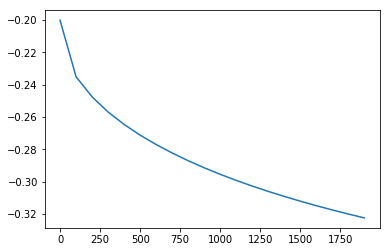

In [81]:
import matplotlib.pyplot as plt
plt.plot(softmax.training_costs[0], softmax.training_costs[1])
plt.show()

# Hyperparameter tuning

Now with the model implemented, we do some hyperparameter coarse-fine tuning. We will do so by generating parameter values for the learning_rate, lambda, number of features, and number of grams to use. For each specified set of parameters, we will train the model and compute the result on the dev set. We will select the parameters that perform the best on the dev set.
Note that we begin with the defaults num_grams = 3, num_features = 1800, learning_rate = 0.3, lambda = 0.03

In [60]:
defaults = [3, 1800, 0.3, 0.09]

In [79]:
train_data, train_data_labels, train_sentiment_labels = train[0], labeled_data_finegrained(train[1]), train[1]
dev_data, dev_data_labels, dev_sentiment_labels = dev[0], labeled_data_finegrained(dev[1]), dev[1]

In [ ]:
# Establish initial results
init = SoftmaxRegression(defaults[0], defaults[1], defaults[2], defaults[3])
init.train([dev_data, dev_data_labels])
labels_init = maxIndicesToLabels(init.test(dev_data))
init_results = polarity_error_nb(labels_init, dev_sentiment_labels)

# Do a coarse search. 
for i in range(50):
    
